In [1]:
# ==============================
# Primera celda - Importaciones
# ==============================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import joblib

sns.set(style='whitegrid')
print("Todas las librerías cargadas.")


Todas las librerías cargadas.


In [2]:
# ==============================
# Segunda celda - Carga de datos
# ==============================
datos = pd.read_csv("C:/RespaldoDB/beisbol.csv")
datos.head()


,Unnamed: 0,equipos,bateos,runs
0,0,Texas,5659,855
1,1,Boston,5710,875
2,2,Detroit,5563,787
3,3,Kansas,5672,730
4,4,St.,5532,762


In [3]:
# ==============================
# Justificación del algoritmo
# ==============================
"""
Se elige el algoritmo de Regresión Lineal Simple porque:
- La relación entre 'bateos' y 'runs' se presume aproximadamente lineal.
- Es interpretable: la pendiente indica el cambio esperado en 'runs' por cada unidad de 'bateos'.
- Es eficiente y no requiere ajuste de muchos hiperparámetros.
"""


"\nSe elige el algoritmo de Regresión Lineal Simple porque:\n- La relación entre 'bateos' y 'runs' se presume aproximadamente lineal.\n- Es interpretable: la pendiente indica el cambio esperado en 'runs' por cada unidad de 'bateos'.\n- Es eficiente y no requiere ajuste de muchos hiperparámetros.\n"

In [4]:
# ==============================
# Preprocesamiento y división
# ==============================
X = datos[['bateos']]  # Variable independiente
y = datos['runs']      # Variable dependiente

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(f"Entrenamiento: {X_train.shape}")
print(f"Prueba: {X_test.shape}")


Entrenamiento: (24, 1)
Prueba: (6, 1)


In [5]:
# ==============================
# Diseño y entrenamiento del modelo
# ==============================
"""
Diseño:
-------
Modelo: LinearRegression de scikit-learn.
Entrenamiento con el conjunto de entrenamiento.
Se evaluará con R² y RMSE.
"""

modelo = LinearRegression()
modelo.fit(X_train, y_train)

print(f"Pendiente (coef_): {modelo.coef_[0]:.4f}")
print(f"Intersección (intercept_): {modelo.intercept_:.4f}")


Pendiente (coef_): 0.6669
Intersección (intercept_): -2981.5172


In [7]:
# Evaluación del modelo (compatible con versiones antiguas de scikit-learn)
y_pred = modelo.predict(X_test)

r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)  # cálculo manual del RMSE

print(f"R²: {r2:.4f}")
print(f"RMSE: {rmse:.4f}")



R²: -0.5175
RMSE: 72.2494


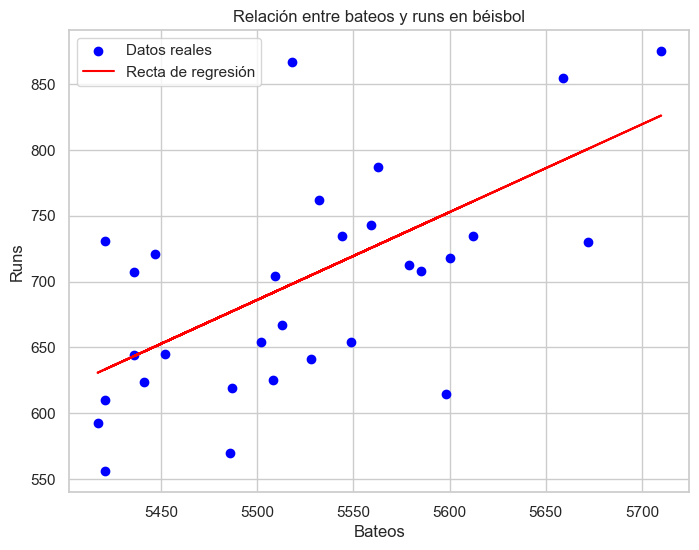

'\nInterpretación:\n---------------\nLa gráfica muestra que existe una relación lineal positiva:\na medida que aumentan los bateos, también aumentan los runs.\nEl modelo captura esta tendencia, aunque algunos equipos\npresentan valores alejados de la recta (posible influencia de otros factores).\n'

In [8]:
# ==============================
# Gráfica personalizada
# ==============================
plt.figure(figsize=(8,6))
plt.scatter(X, y, color='blue', label='Datos reales')
plt.plot(X, modelo.predict(X), color='red', label='Recta de regresión')
plt.xlabel('Bateos')
plt.ylabel('Runs')
plt.title('Relación entre bateos y runs en béisbol')
plt.legend()
plt.show()

"""
Interpretación:
---------------
La gráfica muestra que existe una relación lineal positiva:
a medida que aumentan los bateos, también aumentan los runs.
El modelo captura esta tendencia, aunque algunos equipos
presentan valores alejados de la recta (posible influencia de otros factores).
"""


In [9]:
# ==============================
# Guardar modelo
# ==============================
joblib.dump(modelo, "modelo_regresion_beisbol.pkl")
print("Modelo guardado como modelo_regresion_beisbol.pkl")


Modelo guardado como modelo_regresion_beisbol.pkl
